參考:
https://www.kaggle.com/alexlichtenberg/scikit-learn-getting-started

In [1]:
# 使用colab，先自行上傳dataset zip後再unzip
!unzip data-science-london-scikit-learn.zip

Archive:  data-science-london-scikit-learn.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: trainLabels.csv         


In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np 
import pandas as pd 

In [19]:
train=pd.read_csv('train.csv', header = None)
test=pd.read_csv('test.csv', header = None)
trainlabels=pd.read_csv('trainLabels.csv', header = None)

In [20]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,-0.016250,-0.038010,-1.985616,0.012374,-0.029229,-0.039307,-0.004091,-0.032836,0.428313,0.043427,0.073461,-0.005140,0.912288,0.902301,-0.023110,0.047473,-0.041117,0.012985,-0.395782,0.123921,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,1.026325,0.985889,4.528096,0.995652,2.164547,1.002481,0.970401,1.000130,2.176020,0.987689,0.967282,0.980319,2.178778,4.241903,1.019566,0.995752,0.998182,1.030610,2.296818,2.410453,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,-3.304074,-3.157436,-14.706080,-3.002151,-6.790633,-2.914729,-3.464048,-2.944093,-8.258306,-3.423875,-4.251382,-2.822644,-6.337522,-16.156070,-3.218446,-2.820792,-3.023811,-3.054384,-8.034421,-7.105723,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,-0.713704,-0.730293,-5.094964,-0.694081,-1.441443,-0.757619,-0.668335,-0.727001,-0.983595,-0.594638,-0.588171,-0.698036,-0.542526,-1.822188,-0.720837,-0.617001,-0.668062,-0.696411,-1.936374,-1.562374,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,0.019479,-0.075950,-2.103532,-0.005946,-0.033219,-0.019046,0.008360,-0.011366,0.488217,0.082688,0.094307,-0.004404,1.050071,0.970403,-0.012183,0.014636,-0.017535,0.039219,-0.489296,-0.040604,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,0.709416,0.644553,1.186164,0.664921,1.492611,0.678748,0.674583,0.588732,1.915022,0.711525,0.727896,0.673427,2.367748,3.825862,0.671318,0.731892,0.642797,0.706336,1.044188,1.614308,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,3.409653,3.253032,12.186445,3.737423,6.959736,3.100935,2.805197,3.291544,7.074432,3.343812,2.938033,3.053262,8.096838,14.373681,2.981582,3.662800,3.293911,3.069885,7.413173,8.812739,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [21]:
trainlabels.describe()

,0
count,1000.00000
mean,0.51000
std,0.50015
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [22]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,-0.003660,-0.007303,-1.957133,-0.004248,0.011643,0.003135,-0.018562,-0.009417,0.510326,0.000702,-0.012717,-0.002739,0.989481,1.020193,0.015474,-0.011020,0.010204,0.012467,-0.471728,0.024984,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,1.004065,0.991179,4.533104,0.995835,2.191789,0.994510,1.000388,0.997070,2.151945,0.991179,0.996096,0.991786,2.197387,4.427654,0.995459,0.993179,0.999074,1.004399,2.277023,2.364822,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,-3.796604,-3.550368,-18.354435,-3.881205,-7.307972,-3.999426,-3.942103,-3.807788,-7.649233,-3.690923,-3.709619,-3.514073,-8.027128,-16.034095,-4.213462,-3.642803,-4.380993,-3.530042,-8.298598,-8.016904,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,-0.676108,-0.682887,-5.094238,-0.687180,-1.496236,-0.669166,-0.699755,-0.674884,-0.876184,-0.673208,-0.694344,-0.696292,-0.464890,-1.820445,-0.671986,-0.687161,-0.656783,-0.667406,-1.982627,-1.607159,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,-0.000775,-0.009851,-2.179444,-0.007412,-0.003044,0.005731,-0.022107,-0.014678,0.557244,0.007481,-0.005231,0.006436,0.990320,1.028496,0.009085,-0.014946,0.017904,0.016989,-0.586710,-0.110860,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,0.690303,0.667126,1.097400,0.664078,1.550678,0.680350,0.665828,0.658917,1.962271,0.667735,0.640409,0.670511,2.429367,3.977142,0.691572,0.655649,0.673151,0.688082,0.952552,1.534970,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,3.403080,3.902968,15.727476,4.126432,8.251939,3.761319,3.454845,3.818457,8.642905,3.685600,4.235300,3.834814,9.288831,20.152382,3.609254,3.492944,3.775659,4.126777,8.243573,11.355404,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


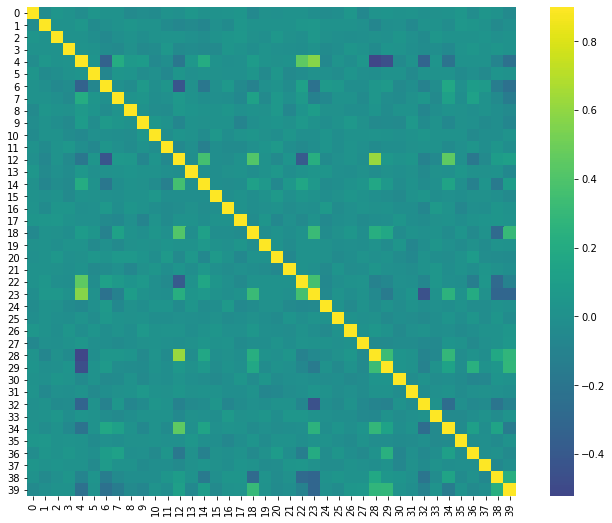

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns

corr = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True, center = 0, cmap = 'viridis')

In [24]:
# 開始建立模型
X = train
Y = trainlabels

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6, n_estimators = 2000)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.875


In [26]:
X_output = test
y_output_pred = rf.predict(X_output)

output = pd.DataFrame(columns = ['Id', 'Solution'])
output['Solution'] = y_output_pred
output['Id'] = list(range(1,9001))
print(output.tail())
output.to_csv('output.csv', index=False)

        Id  Solution
8995  8996         1
8996  8997         1
8997  8998         1
8998  8999         0
8999  9000         1
